In [1]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
from IPython.display import display
from pprint import pprint
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf = inf[(inf.level_no != 4)]  # & (inf.level_no != 0)
inf.shape, inf.columns


c:\Users\soiko\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


((24326, 42),
 Index(['uuid', 'paper_id', 'parent_paper_uuid', 'parent_paper_id', 'title',
        'reference_count', 'citation_count', 'influential_citation_count',
        'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
        'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'level_no',
        'similarity_with_l0', 'similarity_with_immediate_parent',
        'paper_type_label', 'path_from_root', 'similarity_with_l1',
        'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
        'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
        'influence_score', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality',
        'citation_count_standard_norm', 'age_standard_norm'],
       dtype='object'))

## Stats

### Data Usage

In [243]:
kp = pd.read_csv("data/info/key_phrases_extracted.csv", usecols=['paper_id'])
already_extracted = kp.paper_id.unique().tolist()
already_extracted_len = len(already_extracted)
already_extracted_len


6818

In [3]:
unused = 66
pdf_files_id_list = [f.name.split(".")[0] for f in os.scandir(
    "data/papers") if f.name.endswith(".pdf")]
Pdfs_downloaded = len(pdf_files_id_list) + unused
Pdfs_downloaded


7634

In [4]:
paper_covers_by_extracted_key_phrases = inf[inf['paper_id'].isin(already_extracted)]
paper_covers_by_extracted_key_phrases_len = paper_covers_by_extracted_key_phrases.shape[0]
total_papers_duplicates_as_unique = inf.shape[0]
total_unique_papers = inf['paper_id'].nunique()
print(f"Total Papers considering each duplicates as unique:{total_papers_duplicates_as_unique} papers")
print(f"Total Unique Papers: {total_unique_papers}",)
print(f"Total Papers downloaded[pdf]: {Pdfs_downloaded}",)
print(f"Successfully KeyPhrases Extracted Papers: {already_extracted_len}")
print(f"Considering duplicates, KeyPhrases Extracted Papers covers: {paper_covers_by_extracted_key_phrases_len }, {paper_covers_by_extracted_key_phrases_len/total_papers_duplicates_as_unique*100:.2f}% of total papers")


Total Papers considering each duplicates as unique:24326 papers
Total Unique Papers: 9269
Total Papers downloaded[pdf]: 7634
Successfully KeyPhrases Extracted Papers: 6818
Considering duplicates, KeyPhrases Extracted Papers covers: 17279, 71.03% of total papers


In [38]:
inf.level_no.value_counts().sort_index()


0        1
1       39
2     1037
3    23249
Name: level_no, dtype: int64

In [39]:
inf.groupby('level_no').size()


level_no
0        1
1       39
2     1037
3    23249
dtype: int64

In [240]:
import pickle
from graph.graph_info import GraphManager, InfoManager

def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)

def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

g: GraphManager = GraphManager()
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g = g_serialized
g.inf.shape


(24387, 29)

In [248]:
for i, level_iTh_papers_ids in enumerate(g.levelOrderList):
	if i ==4:
		break
	print(f"{('*'*5)} level {i}  {('*'*5)}")
	print(f"total papers: {len(level_iTh_papers_ids)}")
	downloaded_papers = []
	converted = []
	keyPhraseExtracted = []

	for paper in level_iTh_papers_ids:
		paper_id = paper['paper_id']
		# if paper_id in pdf_files_id_list:
		# 	downloaded_papers.append(paper)
		if paper_id in already_extracted:
			keyPhraseExtracted.append(paper)
	print(f"key-phrase extracted:{len(keyPhraseExtracted)}")
	print(
		f"key-phrase extraction percentage in {i} level: {round(len(keyPhraseExtracted)/len(level_iTh_papers_ids),2)}%")


***** level 0  *****
total papers: 1
key-phrase extracted:1
key-phrase extraction percentage in 0 level: 1.0%
***** level 1  *****
total papers: 39
key-phrase extracted:33
key-phrase extraction percentage in 1 level: 0.85%
***** level 2  *****
total papers: 1037
key-phrase extracted:806
key-phrase extraction percentage in 2 level: 0.78%
***** level 3  *****
total papers: 23249
key-phrase extracted:16439
key-phrase extraction percentage in 3 level: 0.71%


### Duplicate Data

In [3]:
duplicateRowsCount = inf[inf.duplicated(['paper_id'])].groupby(
    "paper_id").size().sort_values(ascending=False)

print(duplicateRowsCount.shape[0])
dup_df = inf[inf['paper_id'].isin(duplicateRowsCount.index)].drop_duplicates(
    subset=['paper_id'])
dup_df['dup_count'] = np.nan
dup_df.shape

3031


(3031, 43)

In [4]:
duplicateRowsCount

paper_id
591394cfab5879934a59f6c44f03b6c4009042f0    184
10d6778bc45aebcd58d336b4062b935861d2fe8a    160
9a12ac1e3b51f30042abdadc5636c88d41bf0ca7    160
771ca13f78a6cfda9ed99004a386e9e7e187bd34    144
7b95d389bc6affe6a127d53b04bcfd68138f1a1a    135
                                           ... 
923db0aeb26a6dc1cb42069c9db04e5dd2d2200a      1
9221ab4b7c890434cb5cc3d56d0a582dac52ea70      1
24b20f7b118588055346f4ac5cdb1fe22e886dda      1
24c0da4bf293ffd6adc0babad37de445977c8267      1
0025b963134b1c0b64c1389af19610d038ab7072      1
Length: 3031, dtype: int64

In [5]:
duplicateRowsCountDic = duplicateRowsCount.to_dict()

In [7]:
for index, row in dup_df.iterrows():
	dup_count = row["dup_count"]
	dup_df.at[index, "dup_count"] = duplicateRowsCountDic[row["paper_id"]]


In [8]:
dup_df.sort_values(by=['dup_count'], ascending=False).head(3)


,uuid,paper_id,parent_id,parent_paper_uuid,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l2_em,similarity_with_immediate_parent_em,influence_score,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality,citation_count_standard_norm,age_standard_norm,dup_count
18,40439042-e2b0-44af-aeb9-68c8d1473264,591394cfab5879934a59f6c44f03b6c4009042f0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Learning Algorithms for Keyphrase Extraction,78,875,63,2000.0,Article,...,NaN,0.744783,0.553604,0.006361,0.004528,9.164623e-07,0.000360,-0.087249,-0.392929,184.0
217,523c2ffa-2b77-4937-9bba-ceab3cdd3e20,10d6778bc45aebcd58d336b4062b935861d2fe8a,6f813e6b-d731-4cbc-b721-17c05bdcd8e3,26092619b8be8f0048172bb52bc07b36129b579e,The Anatomy of a Large-Scale Hypertextual Web ...,18,15689,1798,1998.0,Article,...,NaN,0.512808,0.511631,0.008194,0.001509,8.611481e-02,0.000088,1.363748,-0.219984,160.0
53,39d59b01-2268-43a2-8283-4c3daa1d6ca1,9a12ac1e3b51f30042abdadc5636c88d41bf0ca7,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,KEA: practical automatic keyphrase extraction,29,1005,130,1999.0,Conference Paper,...,NaN,0.769029,0.541297,0.007224,0.001617,9.165261e-07,0.000186,-0.074516,-0.306456,160.0


In [34]:
dup_df.columns


Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
       'reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
       'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality', 'level_no',
       'similarity_with_l0', 'similarity_with_immediate_parent',
       'paper_type_label', 'path_from_root', 'similarity_with_l1',
       'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
       'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
       'influence_score', 'in_deg_centrality', 'out_deg_centrality',
       'eigenvector_centrality', 'load_centrality',
       'citation_count_standard_norm', 'age_standard_norm', 'dup_count'],
      dtype='object')

<AxesSubplot:xlabel='dup_count', ylabel='in_deg_centrality'>

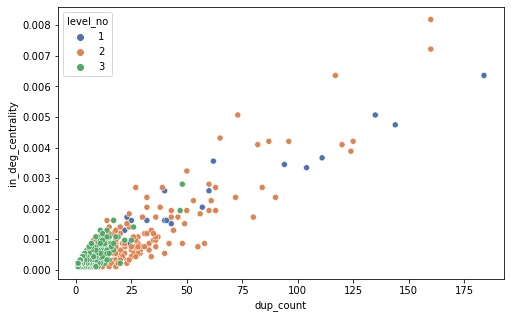

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='in_deg_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='out_deg_centrality'>

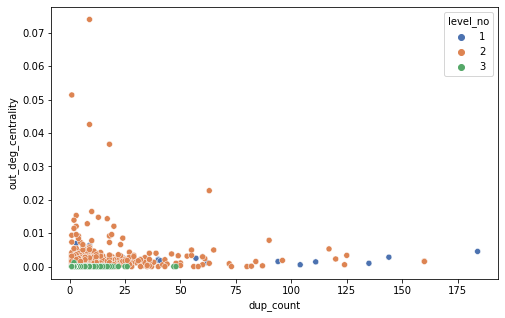

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='dup_count', y='out_deg_centrality',
                data=dup_df, hue='level_no', palette="deep")


<AxesSubplot:xlabel='dup_count', ylabel='degree_centrality'>

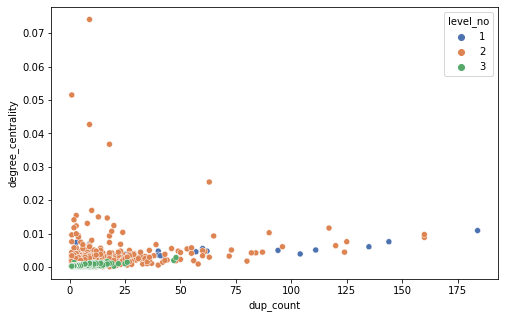

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='degree_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='closeness_centrality'>

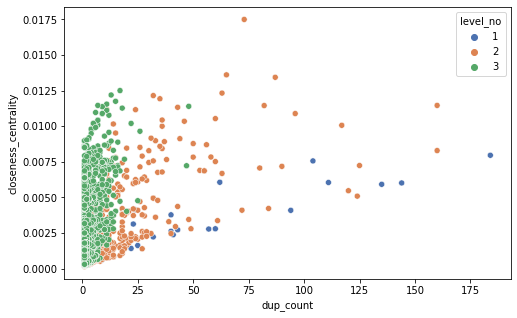

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='closeness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='betweenness_centrality'>

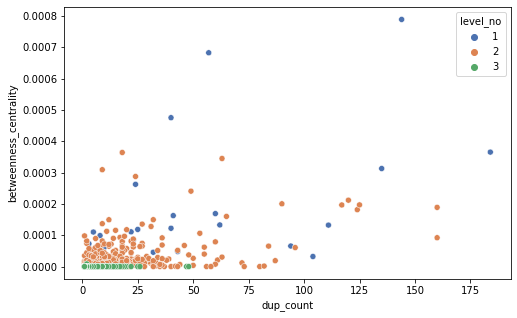

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='betweenness_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='eigenvector_centrality'>

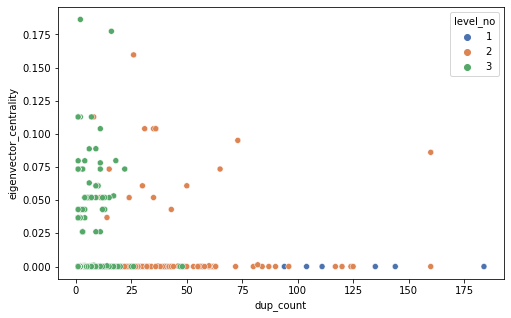

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='eigenvector_centrality', data=dup_df,hue='level_no',palette="deep")

<AxesSubplot:xlabel='dup_count', ylabel='load_centrality'>

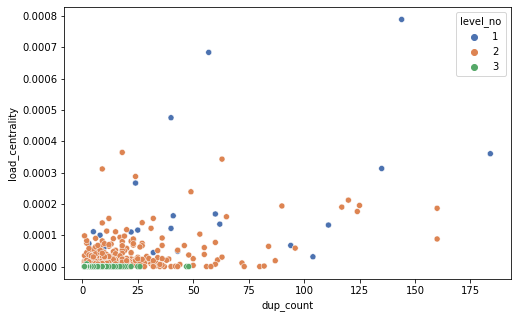

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='dup_count', y='load_centrality', data=dup_df,hue='level_no',palette="deep")

In [12]:
cols = ['dup_count', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality']
g = sns.PairGrid(dup_df, hue='level_no', vars=cols)

# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
plt.savefig("plots/dup_count_vs_centrality.png",format='png', dpi=1200)
plt.savefig("plots/dup_count_vs_centrality.svg",format='svg', dpi=1200)

### Summary

In [2]:
inf = inf[inf.level_no != 0]
inf.shape


(24325, 42)

In [3]:
inf_num = inf.select_dtypes(include=['number'])
inf_num.fillna(0, inplace=True)
inf_num.columns


Index(['reference_count', 'citation_count', 'influential_citation_count',
       'published_date', 'age', 'citation_count_min_max_norm',
       'age_min_max_norm', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'level_no', 'similarity_with_l0',
       'similarity_with_immediate_parent', 'paper_type_label',
       'similarity_with_l1', 'similarity_with_l2', 'similarity_with_l0_em',
       'similarity_with_l1_em', 'similarity_with_l2_em',
       'similarity_with_immediate_parent_em', 'influence_score',
       'in_deg_centrality', 'out_deg_centrality', 'eigenvector_centrality',
       'load_centrality', 'citation_count_standard_norm', 'age_standard_norm'],
      dtype='object')

In [4]:
all_cols = ['similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2','similarity_with_immediate_parent','influence_score',  
'degree_centrality','closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']

In [5]:
inf_num['paper_id'] = inf['paper_id'].values
inf_num['uuid'] = inf['uuid'].values


In [6]:
inf_num.to_csv('data/info/inf_num_raw.csv', index=False)

<AxesSubplot:>

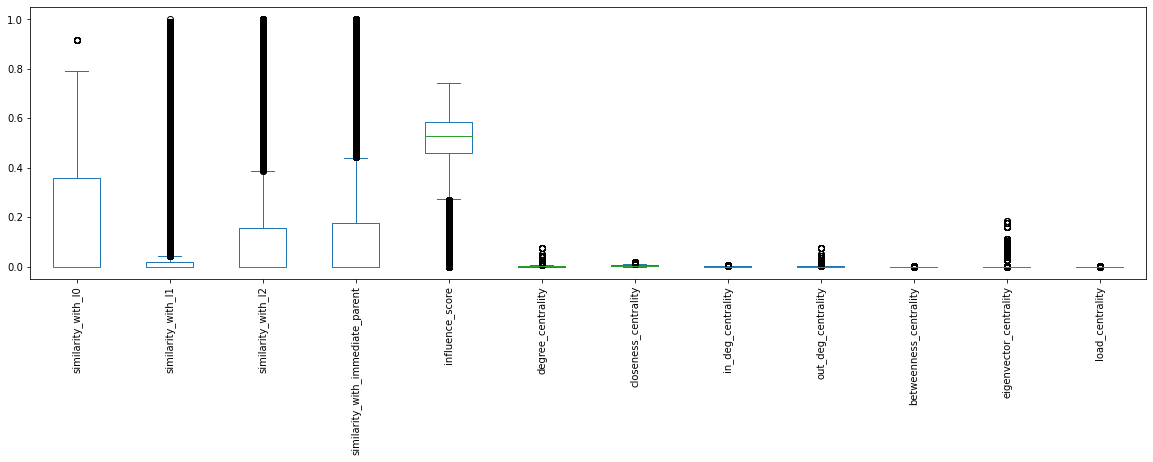

In [7]:

inf_num[all_cols].plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

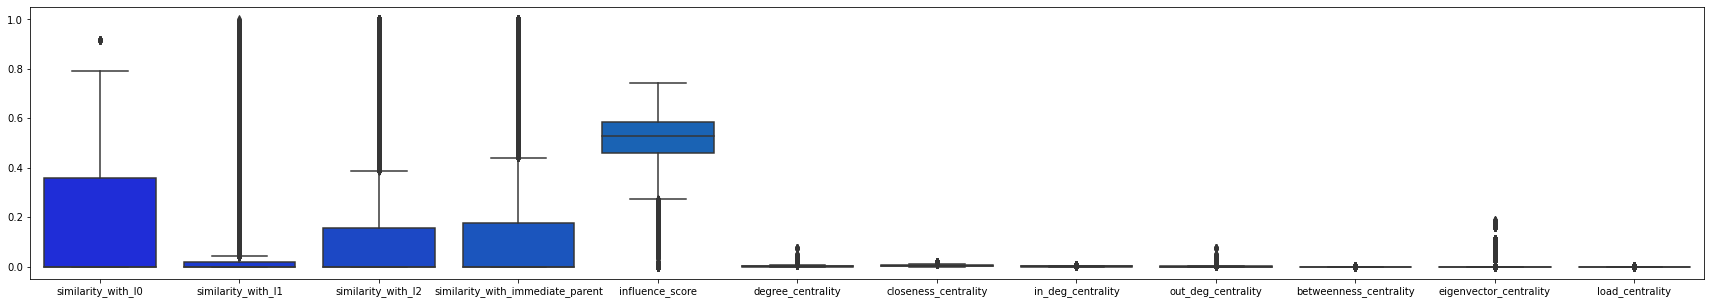

In [8]:
fig, ax = plt.subplots(figsize=(30,5))
sns.boxplot(data=inf_num[all_cols], palette="winter")
# set background color to white
# ax.set_facecolor('white')
# fig.set_facecolor('white')
# plt.savefig("plots/1_boxplot_raw_all.png",format='png',transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_raw_all.svg",format='svg',transparent=False, dpi=500)

<AxesSubplot:>

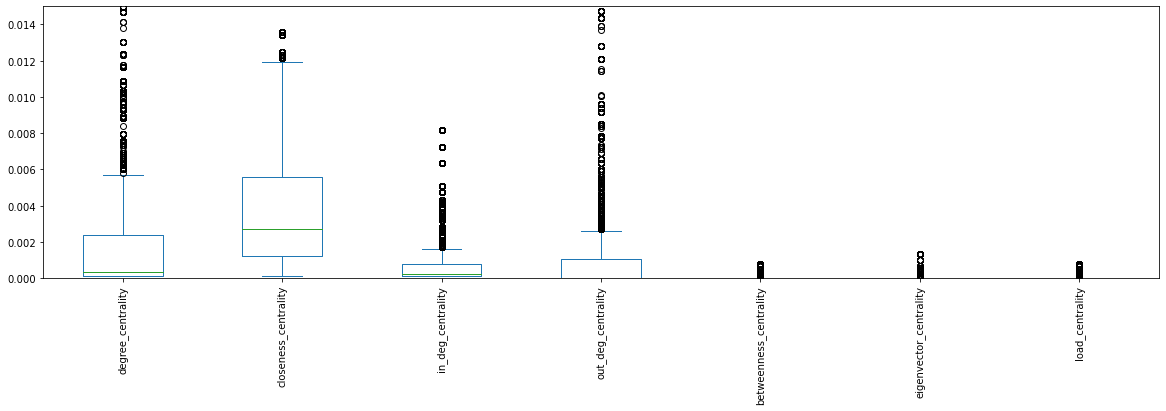

In [9]:
centrality_cols = ['degree_centrality', 'closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']
inf_num[centrality_cols].plot.box(figsize=(20,5), rot=90,ylim=(0,0.015))

<AxesSubplot:>

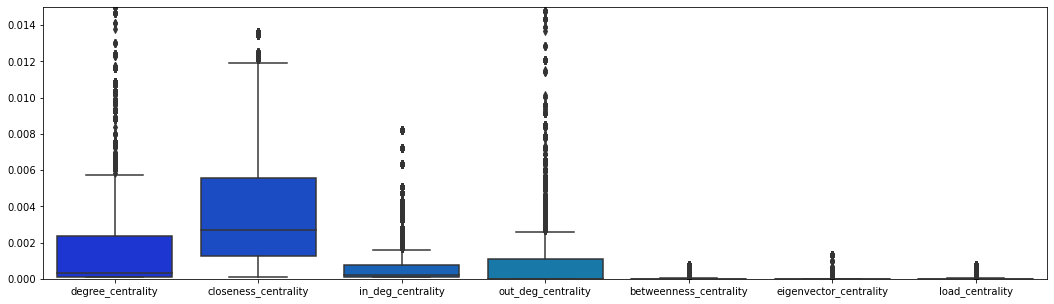

In [10]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_ylim(0,0.015)
sns.boxplot(data=inf_num[centrality_cols], palette="winter")
# set background color to white
# ax.set_facecolor('white')
# fig.set_facecolor('white')
# plt.savefig("plots/1_boxplot_raw_centrality_all.png",format='png',transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_raw_centrality_all.svg",
#             format='svg', transparent=False, dpi=500)


<AxesSubplot:>

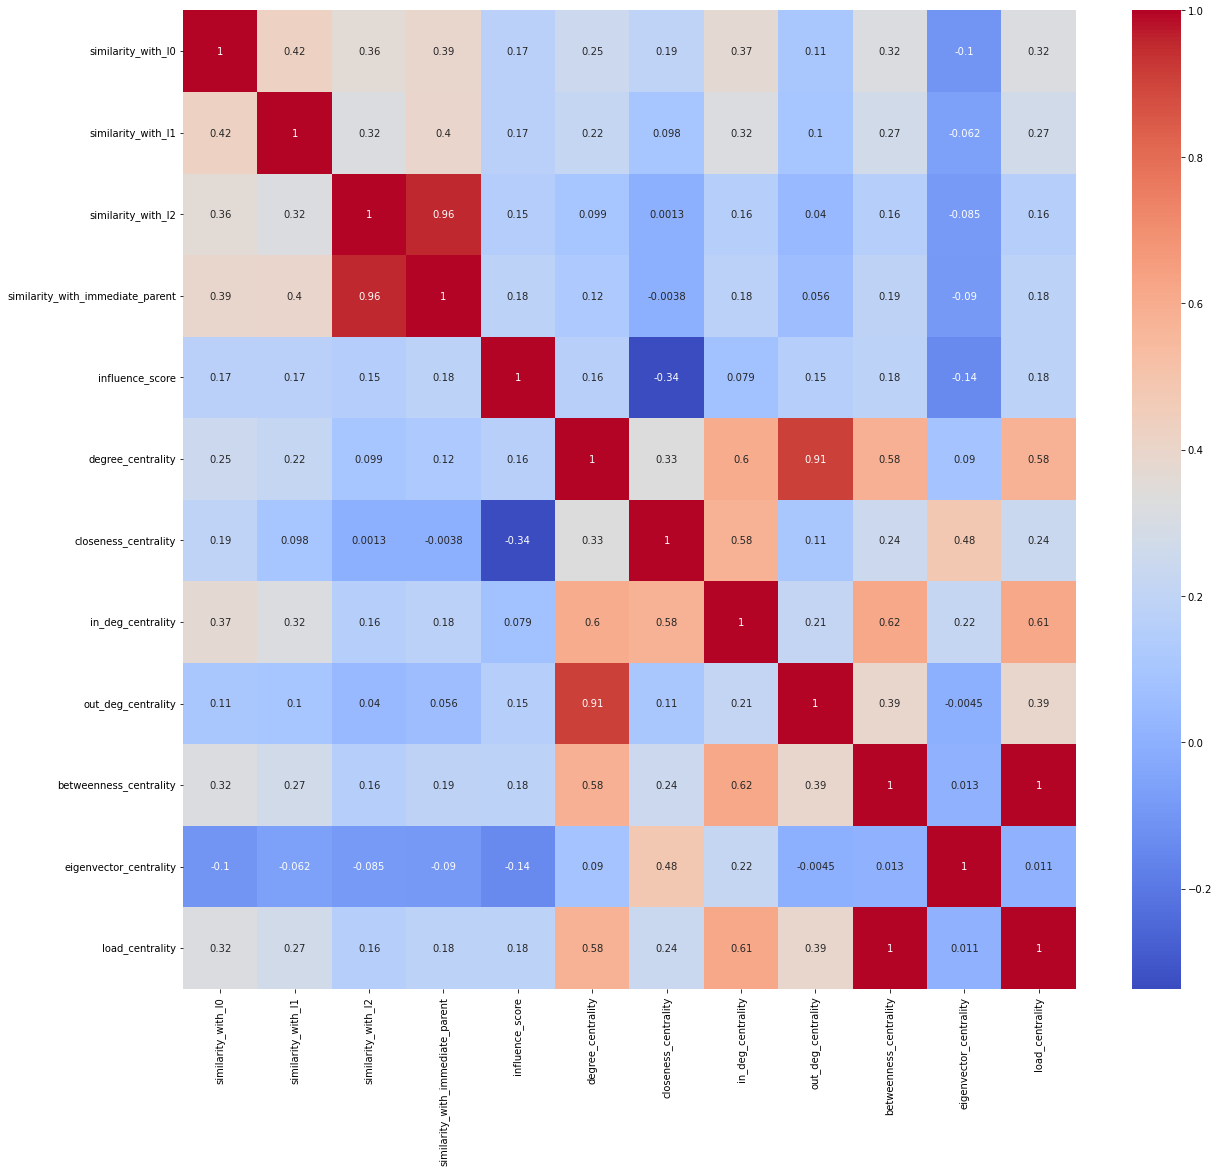

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(inf_num[all_cols].corr(), annot=True, cmap='coolwarm')
# plt.savefig("plots/1_all_correlation.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_all_correlation.svg",
#             format='svg', transparent=False, dpi=500)


In [12]:
corr_matrix = inf_num[all_cols].corr()


In [13]:
feature = 'similarity_with_l0'
corr_matrix[feature][corr_matrix[feature] > 0.3]


similarity_with_l0                  1.000000
similarity_with_l1                  0.420450
similarity_with_l2                  0.361763
similarity_with_immediate_parent    0.394159
in_deg_centrality                   0.369759
betweenness_centrality              0.318488
load_centrality                     0.317805
Name: similarity_with_l0, dtype: float64

In [14]:
feature = 'degree_centrality'
corr_matrix[feature][corr_matrix[feature] > 0.3]


degree_centrality         1.000000
closeness_centrality      0.333930
in_deg_centrality         0.598640
out_deg_centrality        0.910014
betweenness_centrality    0.583872
load_centrality           0.581680
Name: degree_centrality, dtype: float64

<AxesSubplot:>

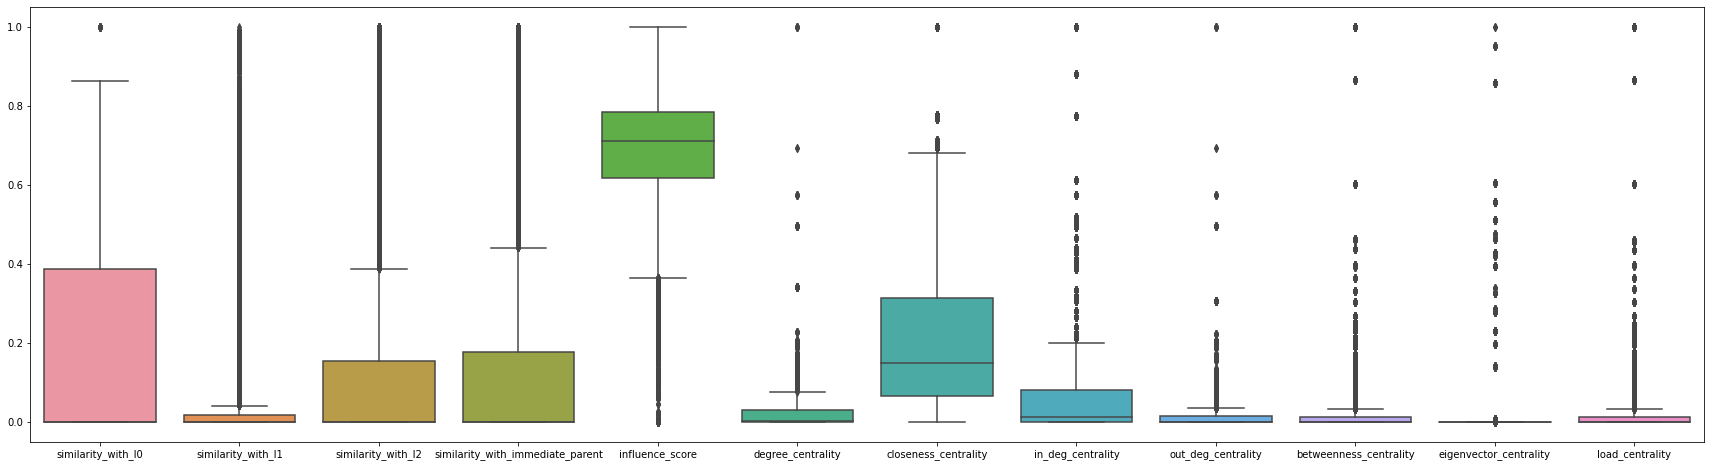

In [15]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_norm = norm.fit_transform(inf_num[all_cols])

X_norm = pd.DataFrame(X_norm, columns=inf_num[all_cols].columns)
sns.set_palette("winter")
fig, ax = plt.subplots(figsize=(30, 8))
# ax.set_ylim(-5,5)
sns.boxplot(data=X_norm)
# X_scaled.plot.box(figsize=(20,5), rot=90)
# plt.savefig("plots/1_boxplot_normalized_all.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_normalized_all.svg",
#             format='svg', transparent=False, dpi=500)


In [16]:
X_norm.shape

(24325, 12)

In [17]:
X_norm['level_no'] = inf_num['level_no'].values


In [18]:
X_norm['level_no'].unique()

array([1, 2, 3], dtype=int64)

In [19]:
X_norm['paper_id'] = inf['paper_id'].values
X_norm['uuid'] = inf['uuid'].values


In [20]:
X_norm.to_csv("data/inf_num_normalized.csv", index=False)

<AxesSubplot:>

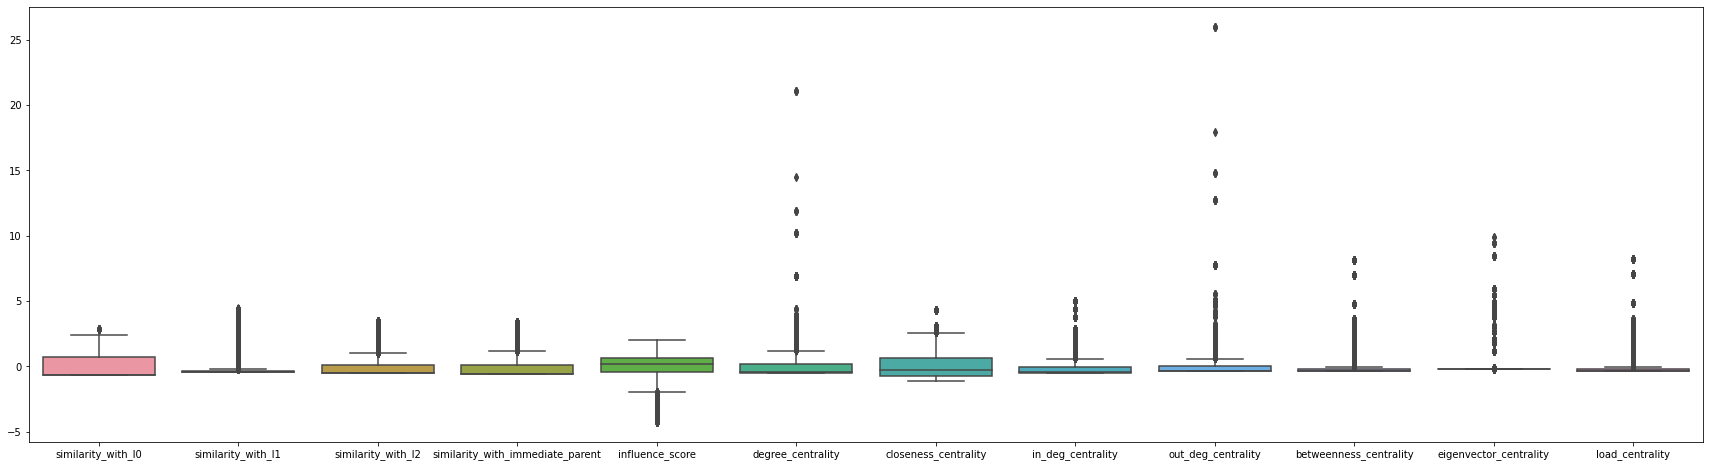

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(inf_num[all_cols])

X_scaled = pd.DataFrame(X_scaled, columns=inf_num[all_cols].columns)
sns.set_palette("winter")
fig,ax = plt.subplots(figsize=(30, 8))
# ax.set_ylim(-5,5)
sns.boxplot(data=X_scaled)
# X_scaled.plot.box(figsize=(20,5), rot=90)
# plt.savefig("plots/1_boxplot_standardized_all.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/1_boxplot_standardized_all.svg",
#             format='svg', transparent=False, dpi=500)

In [22]:
X_scaled['level_no'] = inf['level_no'].values

In [23]:
X_scaled['level_no'].unique()


array([1, 2, 3], dtype=int64)

In [24]:
X_scaled['paper_id'] = inf['paper_id'].values
X_scaled['uuid'] = inf['uuid'].values


In [25]:
X_scaled.to_csv("data/inf_num_standardized.csv", index=False)


## Level Wise Similarity

In [26]:
X_raw = pd.read_csv("data/info/inf_num_raw.csv")
X_norm = pd.read_csv("data/info/inf_num_normalized.csv")
X_scaled = pd.read_csv("data/info/inf_num_standardized.csv")
X_Mixed = pd.read_csv("data/info/inf_mixed.csv")

X_raw.shape,X_norm.shape, X_scaled.shape,X_Mixed.shape

((24325, 29), (24325, 13), (24325, 13), (24325, 29))

In [27]:
all_cols = [ 'similarity_with_l0', 'similarity_with_l1', 'similarity_with_l2','similarity_with_immediate_parent','influence_score', 'degree_centrality','closeness_centrality', 'in_deg_centrality', 'out_deg_centrality', 'betweenness_centrality',	'eigenvector_centrality', 'load_centrality']

### semantic similarity

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

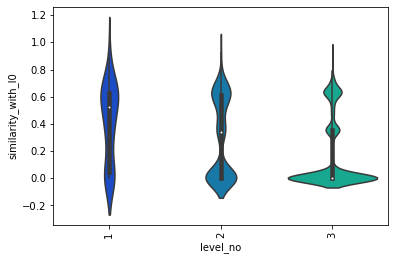

In [55]:
# plt.figure(figsize=(20, 8))
sns.violinplot(data=X_raw, x="level_no",
               y="similarity_with_l0", palette="winter")
plt.xticks(rotation=90)
# plt.ylim(-.1,1)
# plt.savefig("plots/sim/similarity_with_l0_violin.png",
#             format='png', transparent=False, dpi=300)
# plt.savefig("plots/sim/similarity_with_l0_violin.svg",
#             format='svg', transparent=False, dpi=300)

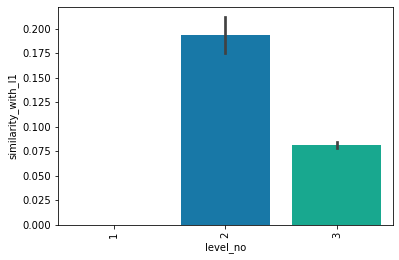

In [49]:
# plt.figure(figsize=(20, 8))
sns.barplot(data=X_raw, x="level_no",
               y="similarity_with_l1", palette="winter")
plt.xticks(rotation=90)
plt.savefig("plots/sim/similarity_with_l1.png",
            format='png', transparent=False, dpi=300)
plt.savefig("plots/sim/similarity_with_l1.svg",
            format='svg', transparent=False, dpi=300)

In [47]:
selectedDf = inf[['level_no', 'similarity_with_l0', 'similarity_with_l1',
                   'similarity_with_l2', 'similarity_with_immediate_parent']]
display(selectedDf.head(3))

melteddf = selectedDf.melt(
    'level_no', var_name='similarities', value_name='score')
display(melteddf)


,level_no,similarity_with_l0,similarity_with_l1,similarity_with_l2,similarity_with_immediate_parent
1,1,0.644213,0.0,0.0,0.644213
2,1,0.349922,0.0,0.0,0.349922
3,1,0.044418,0.0,0.0,0.044418


,level_no,similarities,score
0,1,similarity_with_l0,0.644213
1,1,similarity_with_l0,0.349922
2,1,similarity_with_l0,0.044418
3,1,similarity_with_l0,0.646379
4,1,similarity_with_l0,0.582610
...,...,...,...
97295,3,similarity_with_immediate_parent,0.000000
97296,3,similarity_with_immediate_parent,0.000000
97297,3,similarity_with_immediate_parent,0.000000
97298,3,similarity_with_immediate_parent,0.000000


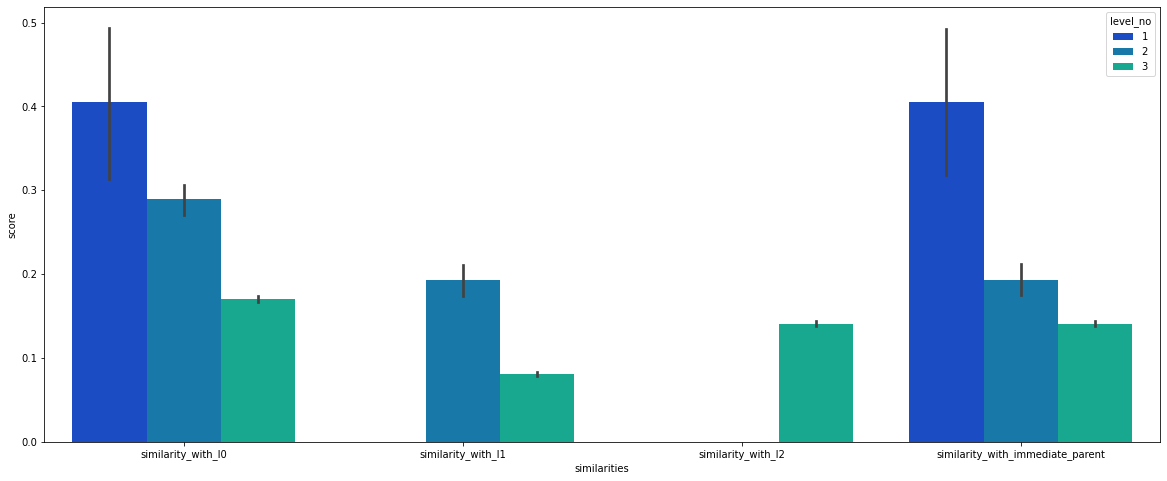

In [49]:
plt.figure(figsize=(20, 8))
sns.barplot(data=melteddf, x="similarities", y="score",
            hue='level_no', palette="winter")
# plt.savefig("plots/3_level_wise_similarity.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/3_level_wise_similarity.svg",
#             format='svg', transparent=False, dpi=500)


In [118]:
level_wise_similarity_mean = inf.groupby('level_no')[['similarity_with_l0', 'similarity_with_l1',
                         'similarity_with_l2']].mean().reset_index()
level_wise_similarity_mean


,level_no,similarity_with_l0,similarity_with_l1,similarity_with_l2
0,1,0.478722,NaN,NaN
1,2,0.372125,0.303997,NaN
2,3,0.241313,0.141705,0.237853


In [90]:
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt('level_no', var_name='similarities_with', value_name='score')
level_wise_similarity_mean_melted

,level_no,similarities_with,score
0,1,similarity_with_l0,0.478722
1,2,similarity_with_l0,0.372125
2,3,similarity_with_l0,0.241313
3,1,similarity_with_l1,NaN
4,2,similarity_with_l1,0.303997
5,3,similarity_with_l1,0.141705
6,1,similarity_with_l2,NaN
7,2,similarity_with_l2,NaN
8,3,similarity_with_l2,0.237853


<AxesSubplot:xlabel='similarities_with', ylabel='score'>

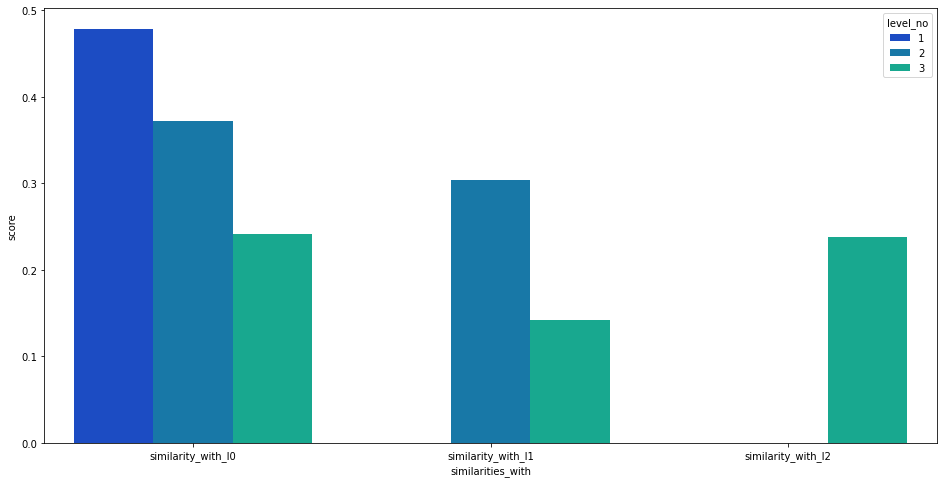

In [121]:
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")

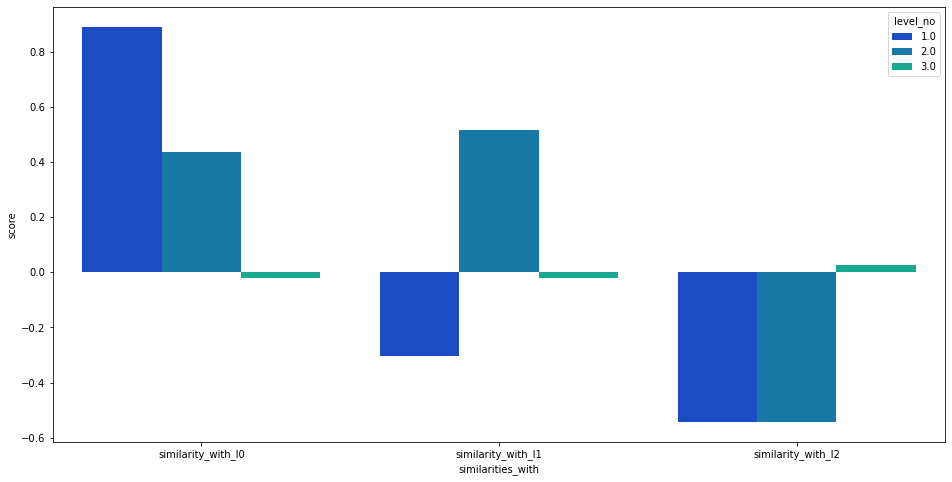

In [55]:
level_wise_similarity_mean = X_scaled.groupby('level_no')[['similarity_with_l0', 'similarity_with_l1',
                                                      'similarity_with_l2']].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")
plt.savefig("plots/3_level_wise_similarity_standardized.png",
            format='png', transparent=False, dpi=500)
plt.savefig("plots/3_level_wise_similarity_standardized.svg",
            format='svg', transparent=False, dpi=500)


<AxesSubplot:xlabel='similarities_with', ylabel='score'>

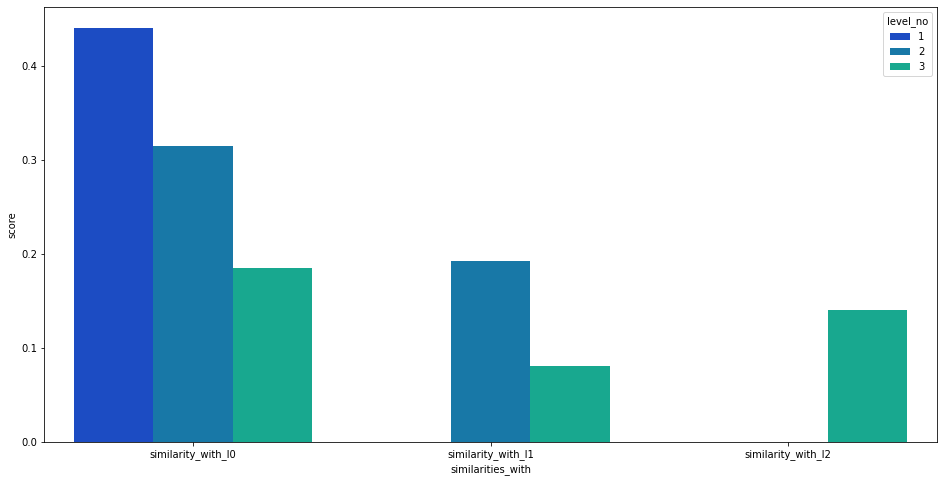

In [31]:
level_wise_similarity_mean = X_norm.groupby('level_no')[['similarity_with_l0', 'similarity_with_l1',
                                                           'similarity_with_l2']].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
# plt.savefig("plots/3_level_wise_similarity_standardized.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/3_level_wise_similarity_standardized.svg",
#             format='svg', transparent=False, dpi=500)


<AxesSubplot:xlabel='similarities_with', ylabel='score'>

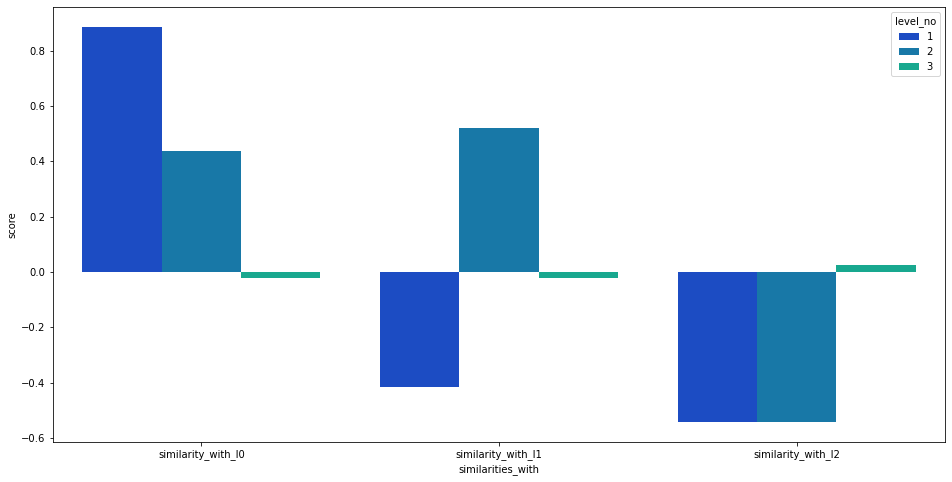

In [28]:
level_wise_similarity_mean = X_scaled.groupby('level_no')[['similarity_with_l0', 'similarity_with_l1',
                                                           'similarity_with_l2']].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
# plt.savefig("plots/3_level_wise_similarity_standardized.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/3_level_wise_similarity_standardized.svg",
#             format='svg', transparent=False, dpi=500)


### Influence score

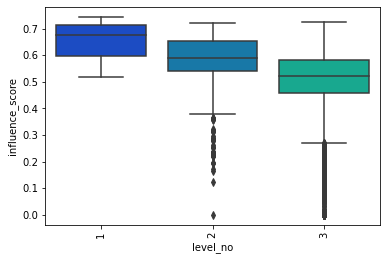

In [99]:
# plt.figure(figsize=(20, 8))
sns.boxplot(data=X_raw, x="level_no",
               y="influence_score", palette="winter")
plt.xticks(rotation=90)
# plt.ylim(-.1,1)
plt.savefig("plots/sim/influence_score_boxplot.png",
            format='png', transparent=False, dpi=300)
plt.savefig("plots/sim/influence_score_boxplot.svg",
            format='svg', transparent=False, dpi=300)


### Centrality

#### raw

In [88]:
all_cols 

['similarity_with_l0',
 'similarity_with_l1',
 'similarity_with_l2',
 'similarity_with_immediate_parent',
 'influence_score',
 'degree_centrality',
 'closeness_centrality',
 'in_deg_centrality',
 'out_deg_centrality',
 'betweenness_centrality',
 'eigenvector_centrality',
 'load_centrality']

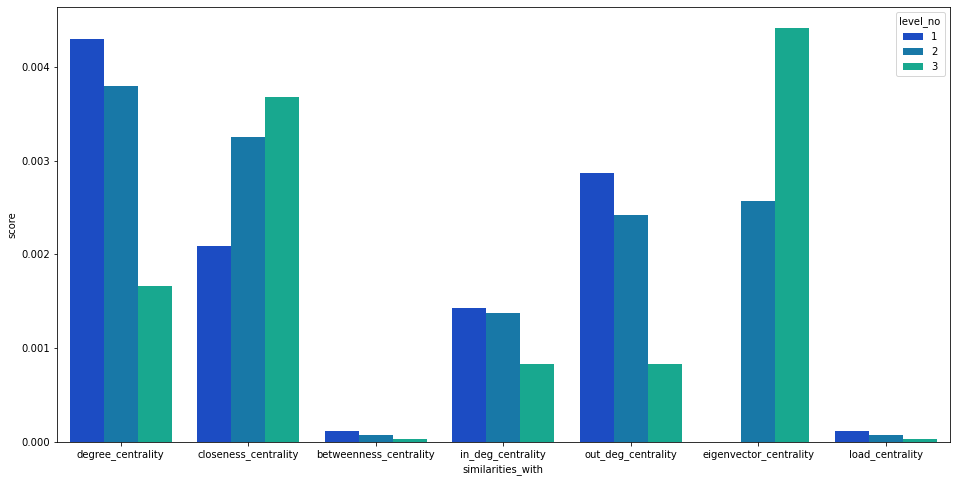

In [40]:
level_wise_similarity_mean = X_raw.groupby('level_no')[['degree_centrality',
                                                        'closeness_centrality', 'betweenness_centrality',
                                                        'in_deg_centrality', 'out_deg_centrality',
                                                        'eigenvector_centrality', 'load_centrality'
                                                        ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
plt.savefig("plots/4_level_wise_centrality_raw.png",
            format='png', transparent=False, dpi=500)
plt.savefig("plots/4_level_wise_centrality_raw.svg",
            format='svg', transparent=False, dpi=500)


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

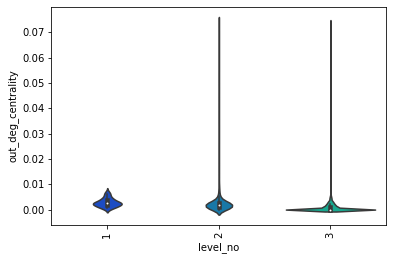

In [87]:
# plt.figure(figsize=(20, 8))
sns.violinplot(data=X_raw, x="level_no",
               y="out_deg_centrality", palette="winter")
plt.xticks(rotation=90)
# plt.ylim(-.1,1)
# plt.savefig("plots/centrality/in_deg_centrality_boxplot.png",
#             format='png', transparent=False, dpi=300)
# plt.savefig("plots/centrality/in_deg_centrality_boxplot.svg",
#             format='svg', transparent=False, dpi=300)


#### normalized

<AxesSubplot:xlabel='similarities_with', ylabel='score'>

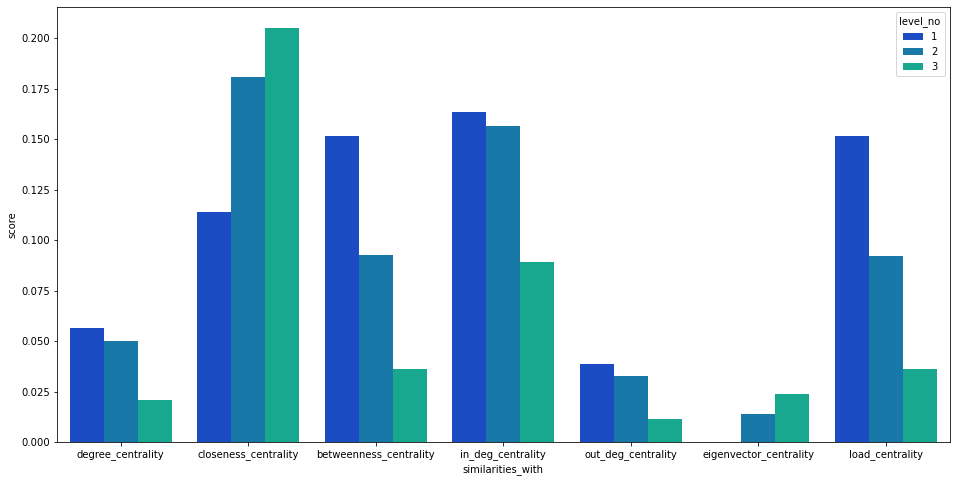

In [8]:
level_wise_similarity_mean = X_norm.groupby('level_no')[['degree_centrality',
                                                         'closeness_centrality', 'betweenness_centrality',
                                                         'in_deg_centrality', 'out_deg_centrality',
                                                         'eigenvector_centrality', 'load_centrality'

                                                         ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
# plt.savefig("plots/4_level_wise_centrality_norm.png",
#             format='png', transparent=False, dpi=500)
# plt.savefig("plots/4_level_wise_centrality_norm.svg",
#             format='svg', transparent=False, dpi=500)


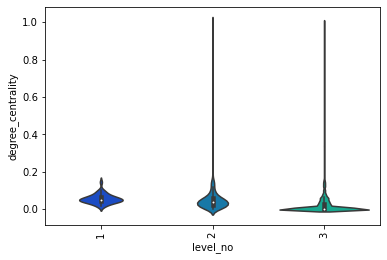

In [97]:
# plt.figure(figsize=(20, 8))
sns.violinplot(data=X_norm, x="level_no",
            y="degree_centrality", palette="winter")
plt.xticks(rotation=90)
# plt.ylim(-.1,1)
plt.savefig("plots/centrality/norm/degree_centrality_violinplot_norm.png",
            format='png', transparent=False, dpi=300)
plt.savefig("plots/centrality/norm/degree_centrality_violinplot_norm.svg",
            format='svg', transparent=False, dpi=300)


In [14]:
X_Mixed = X_raw.copy()
X_Mixed['betweenness_centrality'] = X_norm['betweenness_centrality']
X_Mixed['degree_centrality'] = X_norm['degree_centrality']
X_Mixed['in_deg_centrality'] = X_norm['in_deg_centrality']
X_Mixed['out_deg_centrality'] = X_norm['out_deg_centrality']
X_Mixed['load_centrality'] = X_norm['load_centrality']

In [15]:
# X_Mixed.to_csv("data/info/inf_mixed.csv",index=False)


<AxesSubplot:>

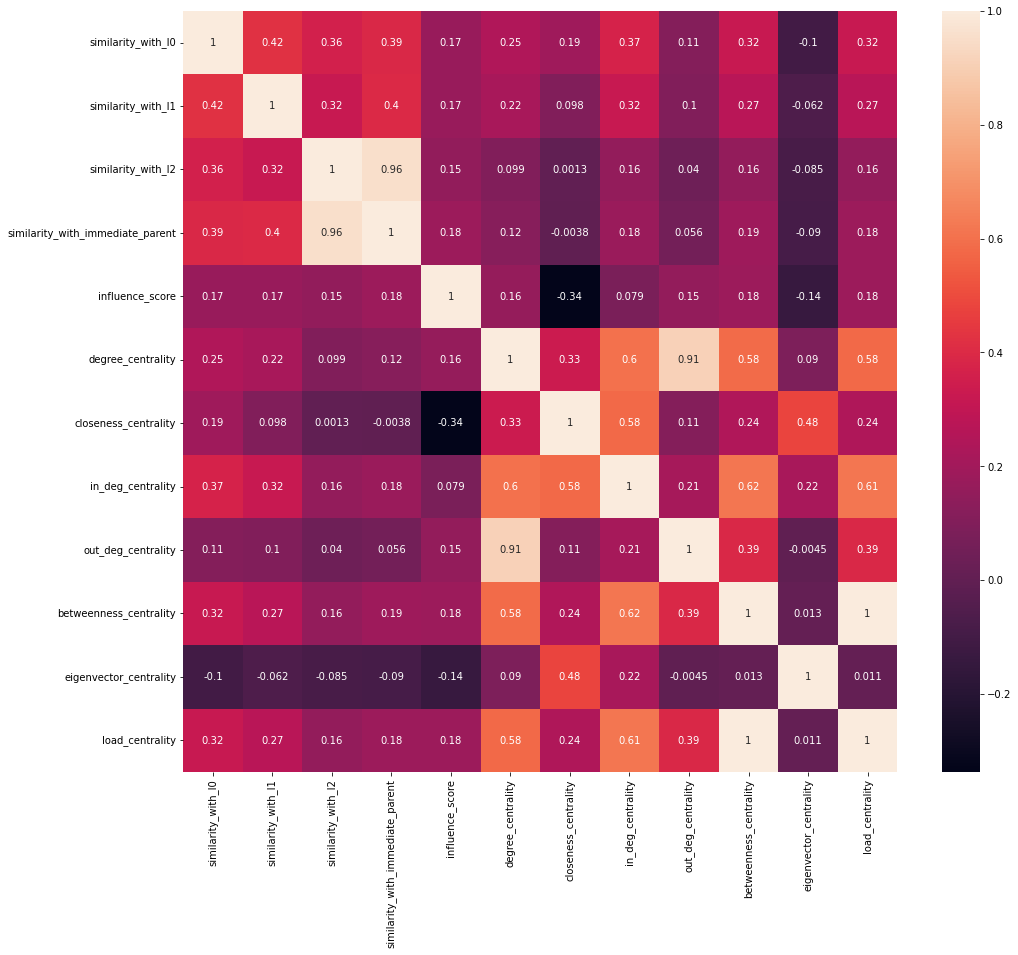

In [10]:
plt.figure(figsize=(16, 14))
sns.heatmap(X_Mixed[all_cols].corr(), annot=True)


In [11]:
feature = 'similarity_with_l0'
corr_matrix = X_Mixed[all_cols].corr()
best_corr_cols = corr_matrix[feature][(corr_matrix[feature] > 0.3)
                                       & (corr_matrix[feature] < 1)].rename_axis('cols').to_frame('score').reset_index()
best_corr_cols


,cols,score
0,similarity_with_l1,0.420450
1,similarity_with_l2,0.361763
2,similarity_with_immediate_parent,0.394159
3,in_deg_centrality,0.369759
4,betweenness_centrality,0.318488
5,load_centrality,0.317805


In [24]:
best_corr_cols = [feature] + best_corr_cols['cols'].values.tolist() + ['influence_score']
best_corr_cols = list(set(best_corr_cols) -
                   set(['similarity_with_immediate_parent']))
best_corr_cols


['similarity_with_l1',
 'in_deg_centrality',
 'similarity_with_l2',
 'betweenness_centrality',
 'similarity_with_l0',
 'load_centrality',
 'influence_score']

#### Standard

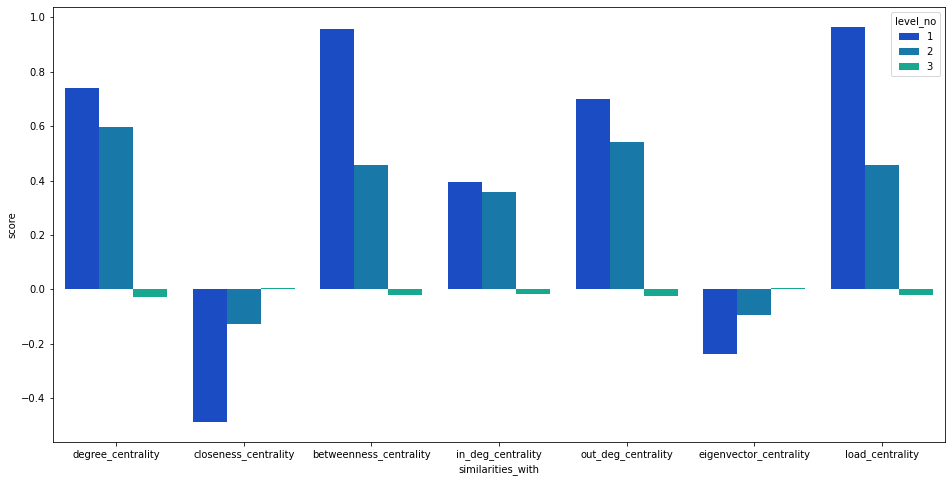

In [35]:
level_wise_similarity_mean = X_scaled.groupby('level_no')[['degree_centrality',
                                                      'closeness_centrality', 'betweenness_centrality',
                                                      'in_deg_centrality', 'out_deg_centrality',
                                                      'eigenvector_centrality', 'load_centrality'

                                                      ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
plt.figure(figsize=(16, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
plt.savefig("plots/4_level_wise_centrality_standardized.png",
            format='png', transparent=False, dpi=500)
plt.savefig("plots/4_level_wise_centrality_standardized.svg",
            format='svg', transparent=False, dpi=500)


### Sim + Centrality

#### v1: raw sim + centrality

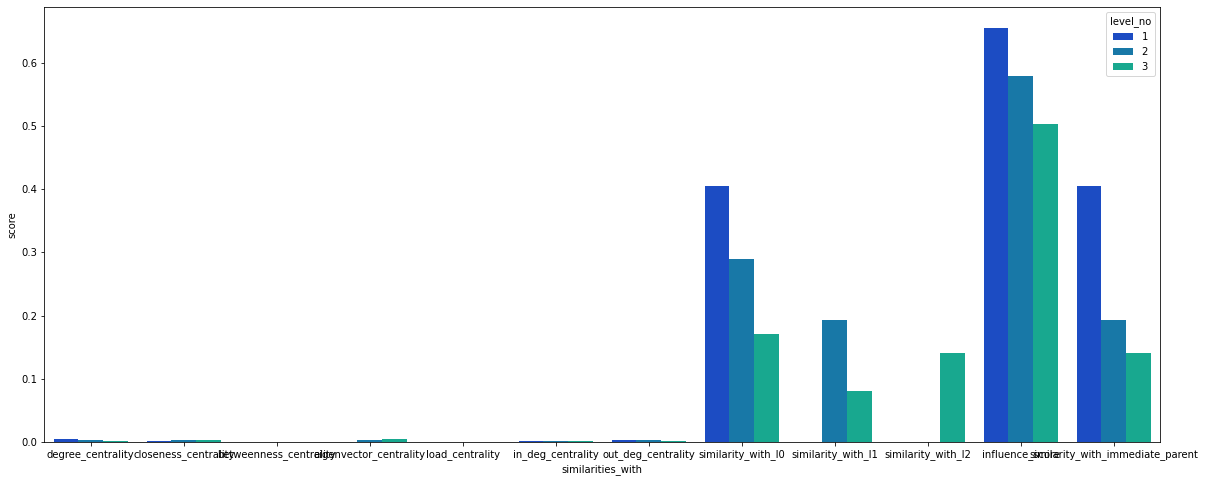

In [57]:
level_wise_similarity_mean = inf_num.groupby('level_no')[['degree_centrality',
                                                           'closeness_centrality',
                                                          'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
                                                           'in_deg_centrality', 'out_deg_centrality',
                                                           'similarity_with_l0', 'similarity_with_l1',
                                                           'similarity_with_l2', 'influence_score',
                                                              'similarity_with_immediate_parent'
                                                           ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
# level_wise_similarity_mean_melted
plt.figure(figsize=(20, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")
plt.savefig("plots/5_level_wise_centrality_and_similarity.png",
             format='png', transparent=False, dpi=500)
plt.savefig("plots/5_level_wise_centrality_and_similarity.svg",
            format='svg', transparent=False, dpi=500)


In [ ]:
X_scaled_Agg = X_raw[centrality_com_cols +
                     ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')


In [3]:
centrality_com_cols = ['betweenness_centrality', 'degree_centrality', 'in_deg_centrality', 'out_deg_centrality', 'load_centrality'] + ['similarity_with_l0',
                                                                                                                                       ]
centrality_com_cols


['betweenness_centrality',
 'degree_centrality',
 'in_deg_centrality',
 'out_deg_centrality',
 'load_centrality',
 'similarity_with_l0']

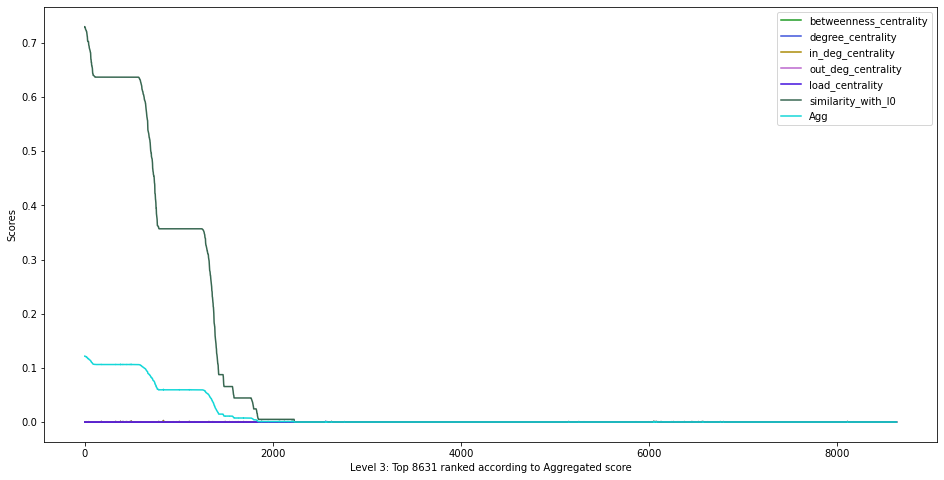

In [5]:
X_scaled_Agg = X_raw[centrality_com_cols +
                     ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
X_scaled_Agg['Agg'] = X[centrality_com_cols].sum(axis=1)
X['Agg'] = X_scaled_Agg['Agg'] / len(centrality_com_cols)
selected_cols = centrality_com_cols + ['Agg']
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


#### v2: scaled sim + centrality

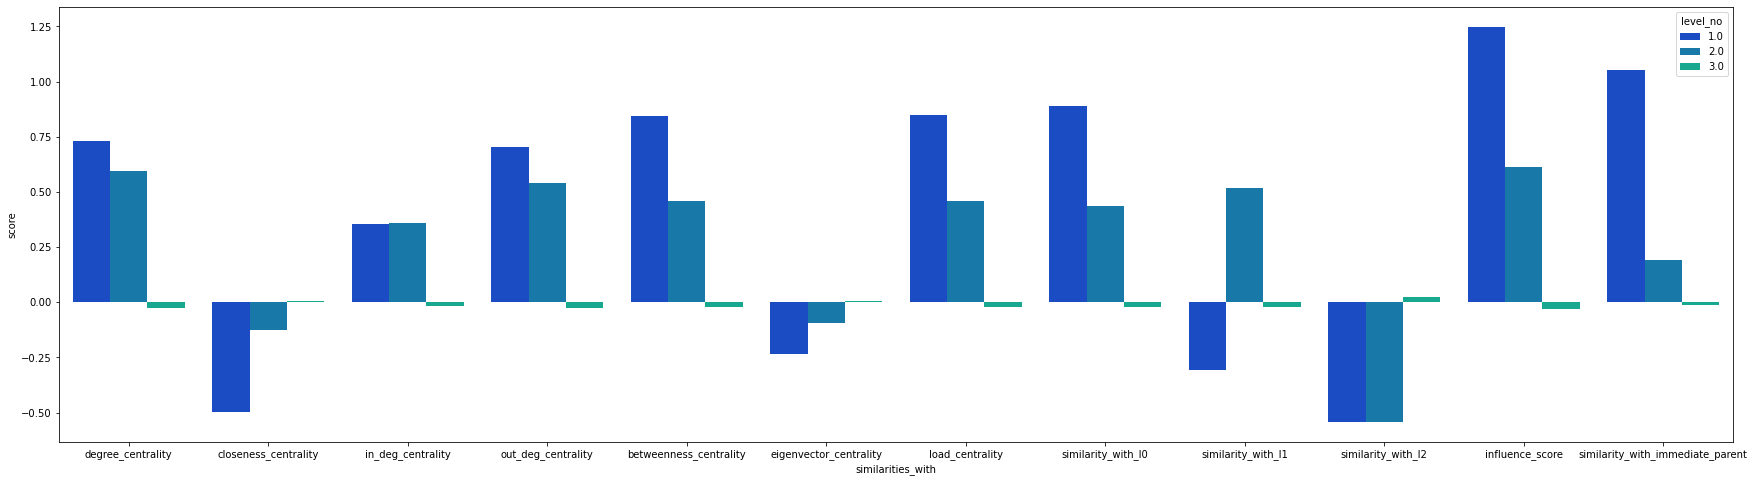

In [58]:
level_wise_similarity_mean = X_scaled.groupby('level_no')[['degree_centrality',
                                                      'closeness_centrality',
                                                      'in_deg_centrality', 'out_deg_centrality',
                                                    'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
                                                      'similarity_with_l0', 'similarity_with_l1',
                                                      'similarity_with_l2', 'influence_score',
                                                      'similarity_with_immediate_parent'
                                                      ]].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
# level_wise_similarity_mean_melted
plt.figure(figsize=(30, 8))
sns.barplot(data=level_wise_similarity_mean_melted, x="similarities_with", y="score", hue='level_no',palette="winter")
plt.savefig("plots/5_level_wise_centrality_and_similarity_standardized.png",
            format='png', transparent=False, dpi=500)
plt.savefig("plots/5_level_wise_centrality_and_similarity_standardized..svg",
            format='svg', transparent=False, dpi=500)


#### v3:  raw sim + normalized centrality

In [25]:
best_corr_cols = ['similarity_with_l1',
 'in_deg_centrality',
 'similarity_with_l2',
 'betweenness_centrality',
 'similarity_with_l0',
 'load_centrality',
 'influence_score']


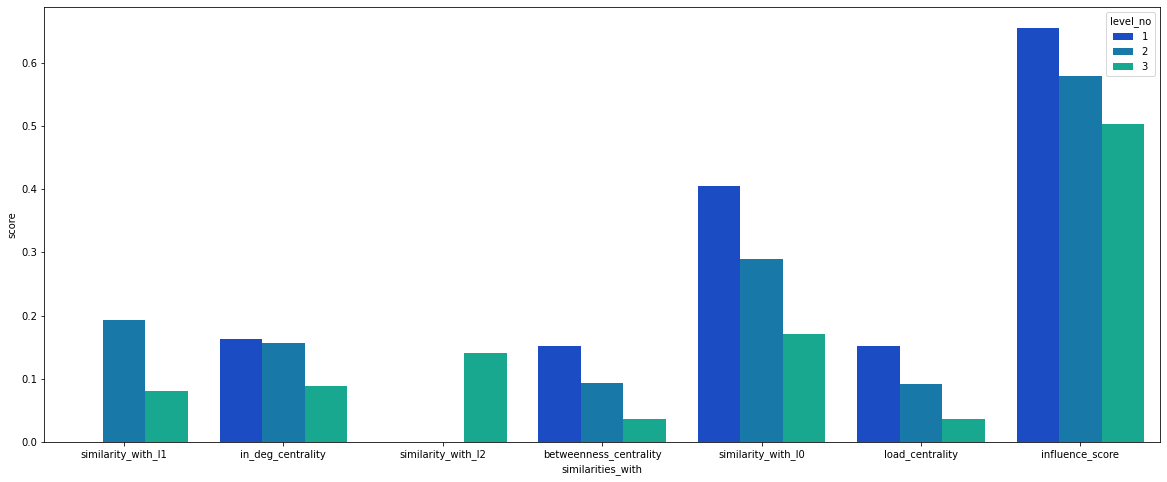

In [26]:
level_wise_similarity_mean = X_Mixed.groupby('level_no')[best_corr_cols].mean().reset_index()
level_wise_similarity_mean_melted = level_wise_similarity_mean.melt(
    'level_no', var_name='similarities_with', value_name='score')
# level_wise_similarity_mean_melted
plt.figure(figsize=(20, 8))
sns.barplot(data=level_wise_similarity_mean_melted,
            x="similarities_with", y="score", hue='level_no', palette="winter")
plt.savefig("plots/rawSim_normCentrality_best_corr_cols.png",
            format='png', transparent=False, dpi=500)
plt.savefig("plots/rawSim_normCentrality_best_corr_cols.svg",
            format='svg', transparent=False, dpi=500)


In [28]:
X_scaled_Agg = X_Mixed[best_corr_cols+['paper_id','uuid','level_no']].copy()
X_scaled_Agg['Agg'] = X_scaled_Agg[best_corr_cols].sum(axis=1)
X_scaled_Agg['Agg'] = X_scaled_Agg['Agg'] / len(best_corr_cols)
selected_cols = best_corr_cols + ['Agg']
print(X_scaled_Agg.shape)
display(X_scaled_Agg.head(2))


(24325, 11)


,similarity_with_l1,in_deg_centrality,similarity_with_l2,betweenness_centrality,similarity_with_l0,load_centrality,influence_score,paper_id,uuid,level_no,Agg
0,0.0,0.306667,0.0,0.602471,0.644213,0.602327,0.674783,03589e1917debe6df148cac8963fd008e4140237,ade6eb61-946a-49f3-835d-74804cb9de3e,1,0.404351
1,0.0,0.000000,0.0,0.005063,0.349922,0.005098,0.722739,05dec9ff0f48f45b09245ba0354748961f18ff77,be2af112-6c57-4598-9813-d02fff71055b,1,0.154689


In [29]:
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
X_scaled_Agg.shape


(9268, 11)

In [ ]:
def operation(X, op_cols):
	return X[op_cols].sum(axis=1)


def plot_level_i_top_k(data, sum_cols, level_no=3, sort_col='Result',plot_type='line', extra_cols_for_plots=[], operation_callback=None,isSave=False):
	selected_cols_for_plots = sum_cols + ['Result'] + extra_cols_for_plots

	X = data[sum_cols + ['paper_id', 'uuid', 'level_no']].copy()
	X = X.drop_duplicates(subset=['paper_id'], keep='first')

	# X['Result'] = operation_callback(X, operation_cols)
	X['Result'] = X[sum_cols].sum(axis=1)
	X['Result'] = X['Result'] / len(sum_cols)

	X_level_i = X[X['level_no'] == level_no]
	level_i_paper_len = X_level_i.shape[0]

	level_i_top_k = X_level_i.sort_values(by=sort_col, ascending=False)[
            selected_cols_for_plots].head(level_i_paper_len)

	np.random.seed(43)
	x = np.arange(len(level_i_top_k))
	fig, ax = plt.subplots(figsize=(16, 8))
	for i in level_i_top_k.columns:
		if plot_type == 'line':
			ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'bar':
			ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'barh':
			ax.barh(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'hist':
			ax.hist(level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'box':
			ax.boxplot(level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'scatter':
			ax.scatter(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'hexbin':
			ax.hexbin(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'kde':
			ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
			ax.hist(level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'area':
			ax.area(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
		elif plot_type == 'pie':
			ax.pie(level_i_top_k[i], label=i, color=np.random.rand(3,))

	plt.xlabel(
		f'Level {level_no}: Top {level_i_paper_len} ranked papers; sort by: `{sort_col}` score')
	plt.ylabel('Scores')
	plt.legend(loc='upper right')
	plt.show()
	if isSave:
		plt.savefig(f"plots/level_{level_no}_top_{level_i_paper_len}_ranked_papers_sort_by_{sort_col}.png",format='png', transparent=False, dpi=300)
	plt.close()


##### L 1

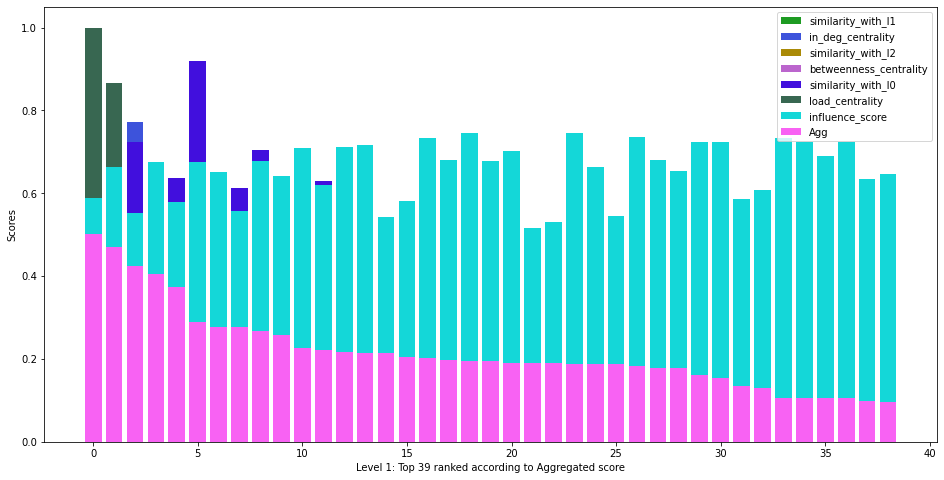

In [31]:
level_no = 1
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


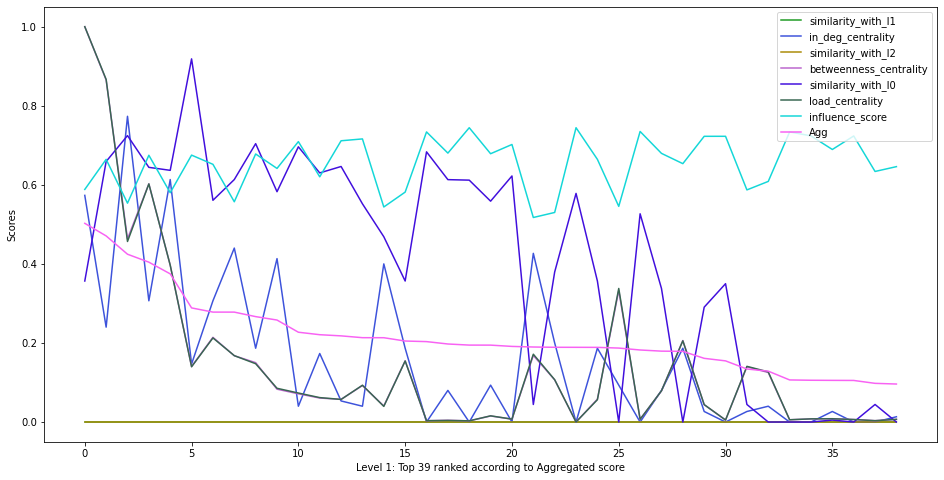

In [37]:
level_no = 1
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


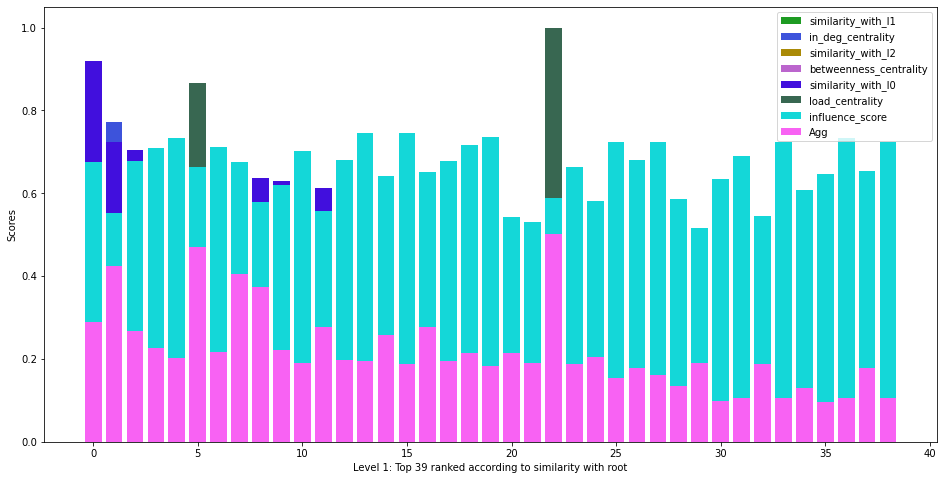

In [41]:
level_no = 1
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to similarity with root')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


##### L2

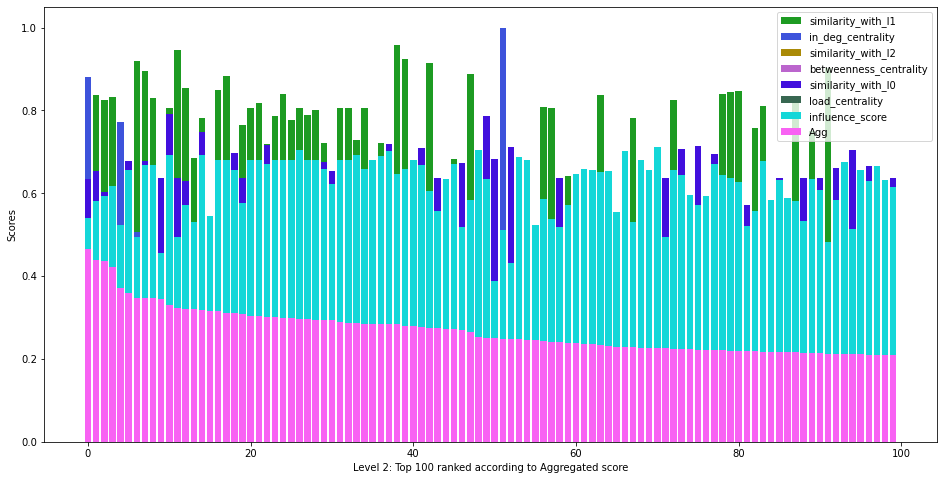

In [33]:
level_no = 2
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


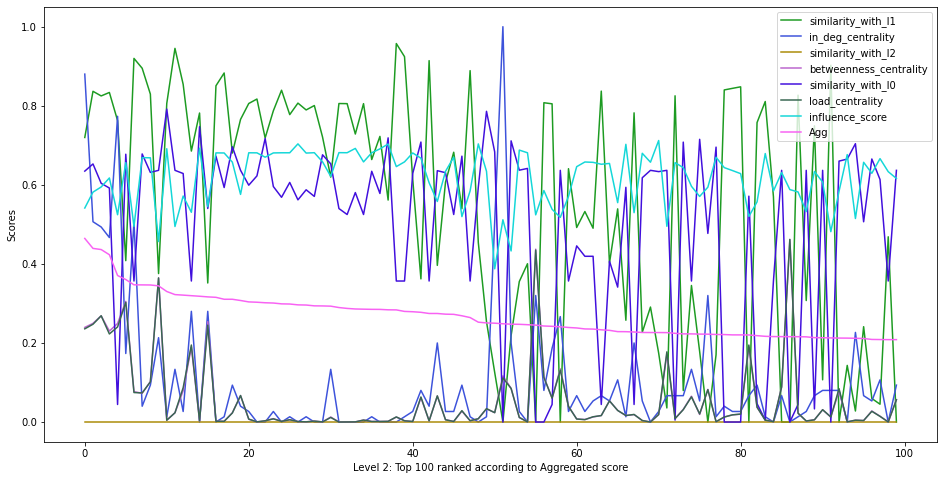

In [38]:
level_no = 2
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


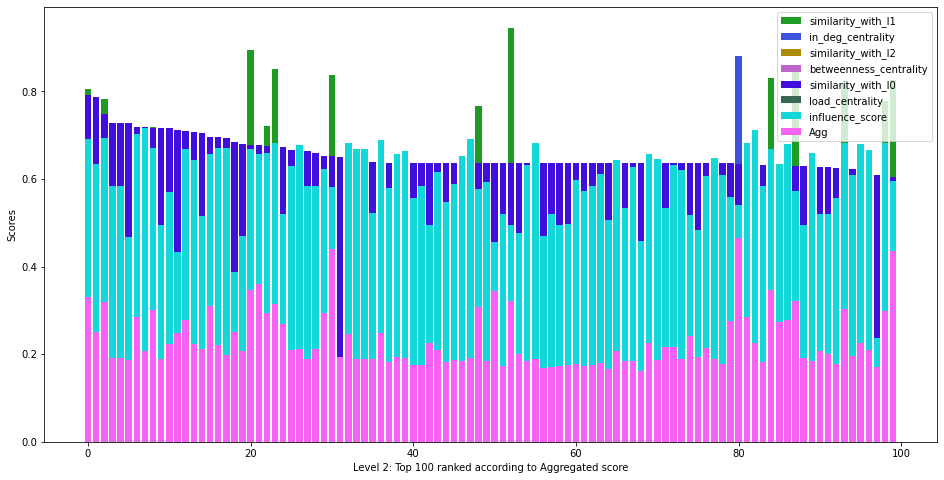

In [42]:
level_no = 2
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


##### Level 3

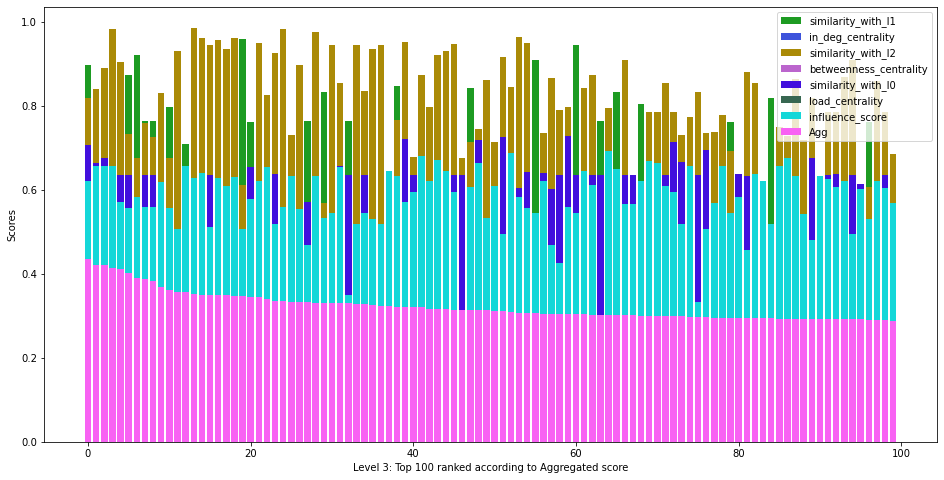

In [34]:
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


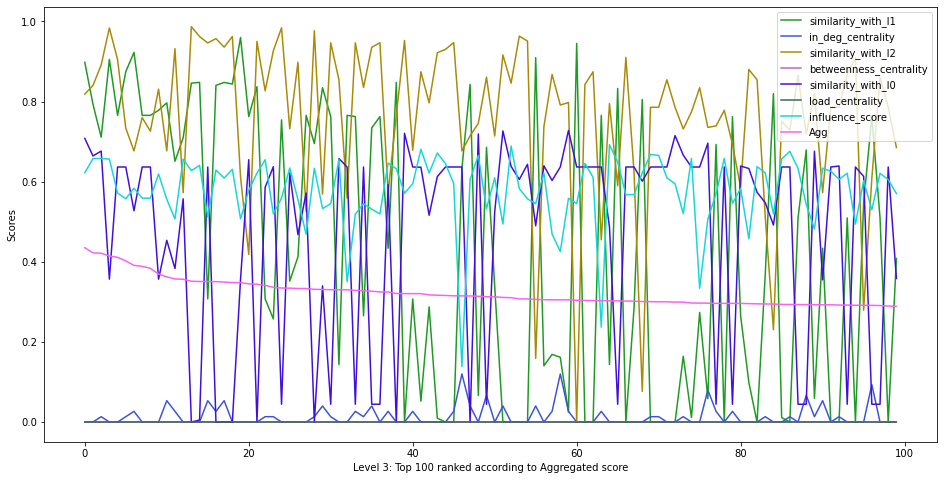

In [39]:
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="Agg", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


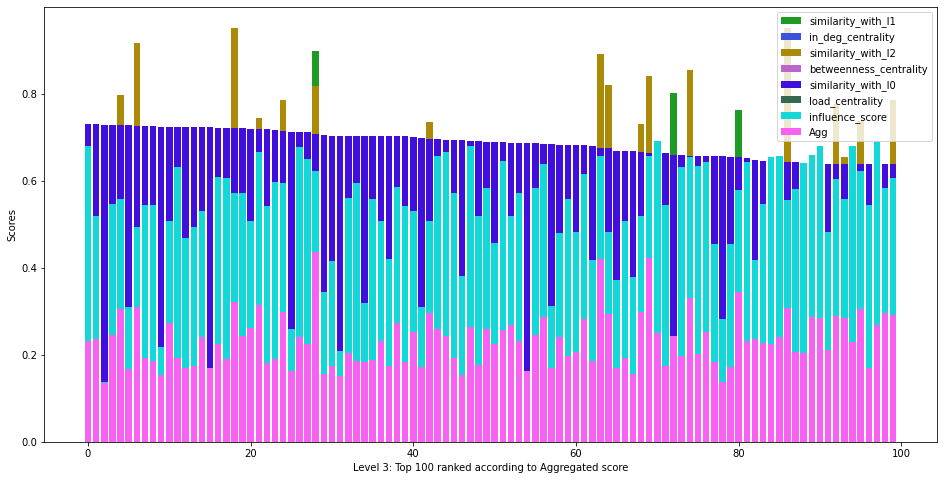

In [43]:
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
if level_i_paper_len > 100:
	level_i_paper_len = 100
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.bar(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


##### l0+centrality

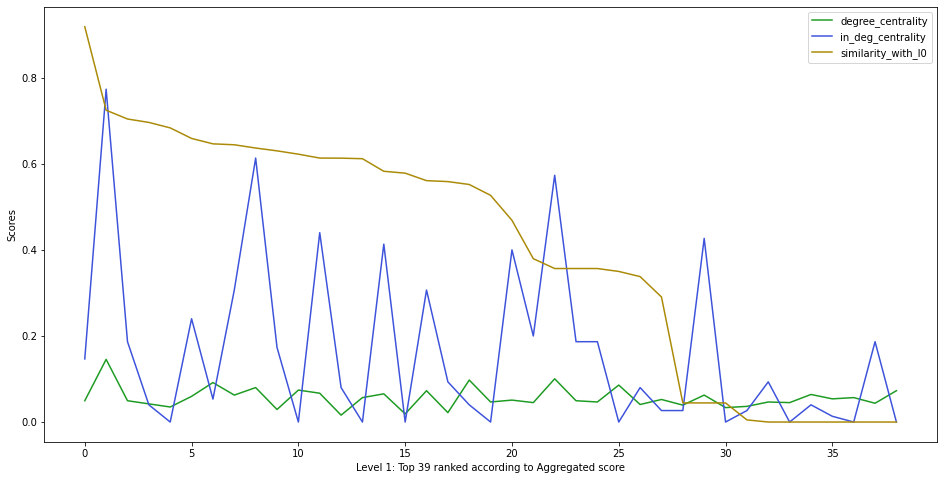

In [104]:
centrality_com_cols = ['degree_centrality',
                       'in_deg_centrality', ] + ['similarity_with_l0']
X_scaled_Agg = X_Mixed[centrality_com_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
level_no = 1
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[centrality_com_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


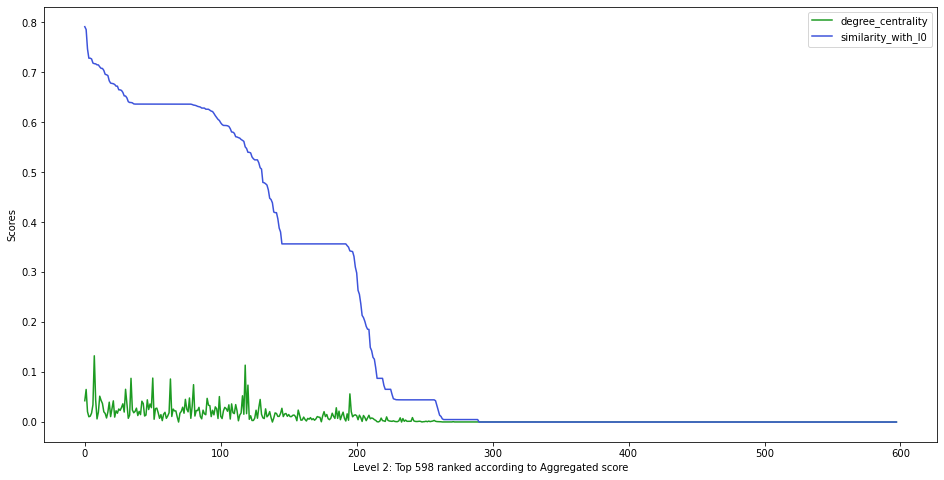

In [116]:
centrality_com_cols = ['degree_centrality',
                    #    'in_deg_centrality',
					   
					    ] + ['similarity_with_l0']
X_scaled_Agg = X_Mixed[centrality_com_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
X_scaled_Agg['degree_centrality'] = X_scaled_Agg['degree_centrality'] * \
	X_scaled_Agg['similarity_with_l0']
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
level_no = 2
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[centrality_com_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


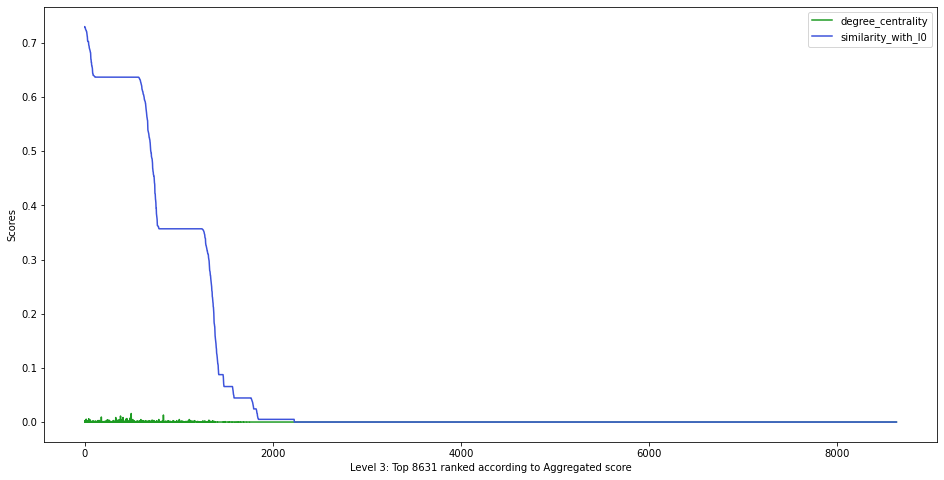

In [120]:
centrality_com_cols = ['degree_centrality',
                    #    'in_deg_centrality', 
					   
					   ] + ['similarity_with_l0']
X_scaled_Agg = X_Mixed[centrality_com_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
X_scaled_Agg['degree_centrality'] = X_scaled_Agg['degree_centrality'] * \
	X_scaled_Agg['similarity_with_l0']
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[centrality_com_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [124]:
centrality_com_cols = ['betweenness_centrality', 'degree_centrality', 'in_deg_centrality', 'out_deg_centrality', 'load_centrality'] + [                                                                                                                                       'similarity_with_l0',
                                                                                                                                       ]
centrality_com_cols


['betweenness_centrality',
 'degree_centrality',
 'in_deg_centrality',
 'out_deg_centrality',
 'load_centrality',
 'similarity_with_l0']

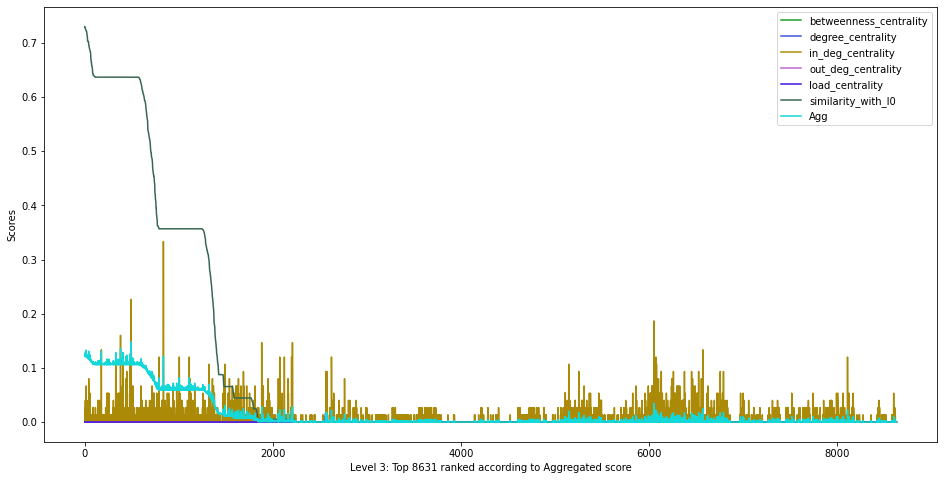

In [127]:
X_scaled_Agg = X_Mixed[centrality_com_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
X_scaled_Agg['Agg'] = X_scaled_Agg[centrality_com_cols].sum(axis=1)
X_scaled_Agg['Agg'] = X_scaled_Agg['Agg'] / len(centrality_com_cols)
selected_cols = centrality_com_cols + ['Agg']

level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [128]:
centrality_com_cols


['betweenness_centrality',
 'degree_centrality',
 'in_deg_centrality',
 'out_deg_centrality',
 'load_centrality',
 'similarity_with_l0']

(9268, 10)


,betweenness_centrality,degree_centrality,in_deg_centrality,out_deg_centrality,load_centrality,similarity_with_l0,paper_id,uuid,level_no,Agg
0,0.602471,0.040322,0.12727,0.029112,0.602327,0.644213,03589e1917debe6df148cac8963fd008e4140237,ade6eb61-946a-49f3-835d-74804cb9de3e,1,0.340952
1,0.005063,0.030052,0.00000,0.085881,0.005098,0.349922,05dec9ff0f48f45b09245ba0354748961f18ff77,be2af112-6c57-4598-9813-d02fff71055b,1,0.079336


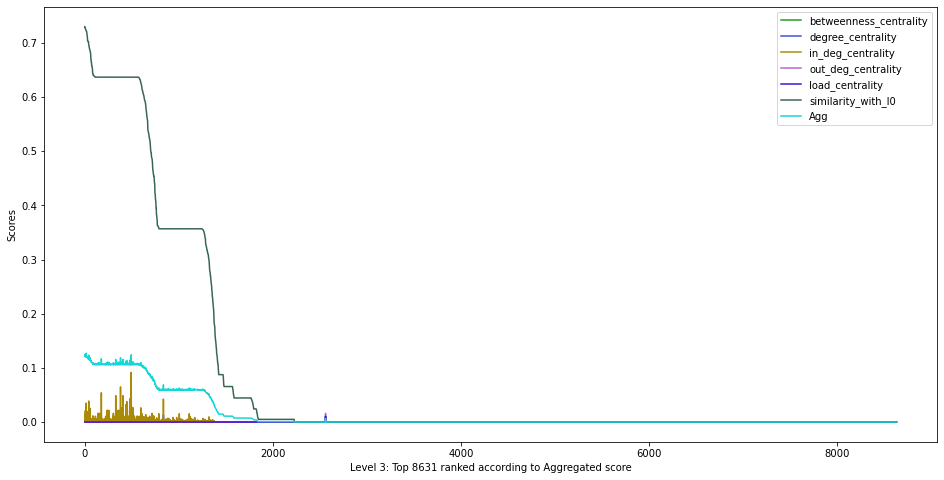

In [129]:
X_scaled_Agg = X_Mixed[centrality_com_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
X_scaled_Agg['degree_centrality'] = X_scaled_Agg['degree_centrality'] * \
	X_scaled_Agg['similarity_with_l0']
X_scaled_Agg['in_deg_centrality'] = X_scaled_Agg['in_deg_centrality'] * \
	X_scaled_Agg['similarity_with_l0']
X_scaled_Agg['in_deg_centrality'] = X_scaled_Agg['in_deg_centrality'] * \
	X_scaled_Agg['similarity_with_l0']

X_scaled_Agg['Agg'] = X_scaled_Agg[centrality_com_cols].sum(axis=1)
X_scaled_Agg['Agg'] = X_scaled_Agg['Agg'] / len(centrality_com_cols)
selected_cols = centrality_com_cols + ['Agg']
print(X_scaled_Agg.shape)
display(X_scaled_Agg.head(2))

level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()


In [9]:
simlarrity_cols = [
                    'similarity_with_l0',
                    'similarity_with_l1',
                    'similarity_with_l2',

                    ]


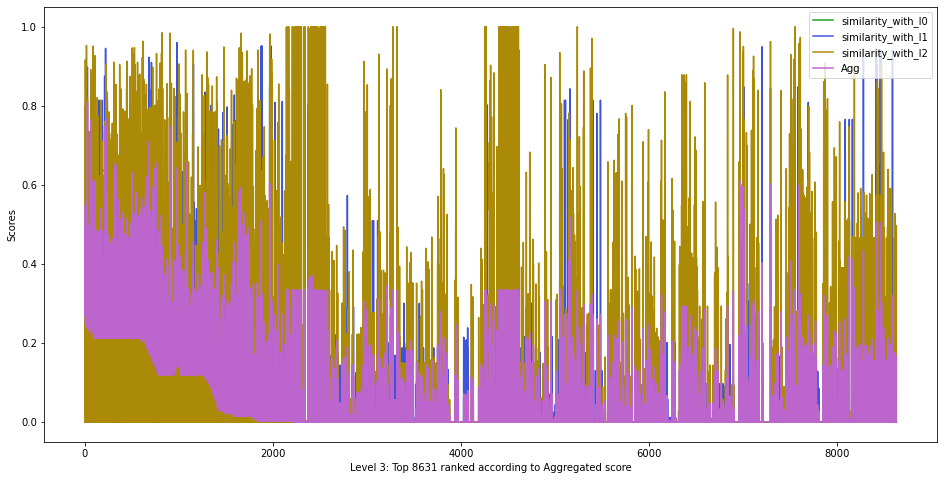

In [13]:
X_scaled_Agg = X_Mixed[simlarrity_cols +
                       ['paper_id', 'uuid', 'level_no']].copy()
# drop  duplicate papers with same paper_id
X_scaled_Agg = X_scaled_Agg.drop_duplicates(subset=['paper_id'], keep='first')
X_scaled_Agg['Agg'] = X_scaled_Agg[simlarrity_cols].sum(axis=1)
X_scaled_Agg['Agg'] = X_scaled_Agg['Agg'] / len(simlarrity_cols)
selected_cols = simlarrity_cols + ['Agg']
level_no = 3
level_i = X_scaled_Agg[X_scaled_Agg['level_no'] == level_no]
level_i_paper_len = level_i.shape[0]
# if level_i_paper_len > 100:
# 	level_i_paper_len = 2000
# print(level_3.shape)
level_i_top_k = level_i.sort_values(
	# by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)
	by="similarity_with_l0", ascending=False)[selected_cols].head(level_i_paper_len)

np.random.seed(43)
x = np.arange(len(level_i_top_k))
fig, ax = plt.subplots(figsize=(16, 8))
for i in level_i_top_k.columns:
	ax.plot(x, level_i_top_k[i], label=i, color=np.random.rand(3,))
plt.xlabel(
	f'Level {level_no}: Top {level_i_paper_len} ranked according to Aggregated score')
plt.ylabel('Scores')
plt.legend(loc='upper right')
plt.show()
plt.close()
